<a href="https://colab.research.google.com/github/toninho21/Reconhecimento_de_Libras/blob/main/Reconhecimento_de_Libras_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistema de reconhecimento de Linguagem de Libras

---




Autor: Antonio Luiz Ferrador Filho.
Baseado no projeto de João Pedro (curso EY-DIO), a quem agradeço



**Importação das bibliotecas** 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

**Definir origem do dataset e extrair imagens**

In [2]:
_URL = 'https://docs.google.com/uc?export=download&id=1Mea2MxvxlCSohaXrvjkEVY3iP6eg3SUW&export=download&confirm=t'
zip_dir = tf.keras.utils.get_file('libras.zip', origin=_URL, extract=True)

**Mostrar diretórios baixados e extraídos**


In [3]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/train
/root/.keras/datasets/train/V
/root/.keras/datasets/train/R
/root/.keras/datasets/train/U
/root/.keras/datasets/train/P
/root/.keras/datasets/train/F
/root/.keras/datasets/train/N
/root/.keras/datasets/train/I
/root/.keras/datasets/train/T
/root/.keras/datasets/train/D
/root/.keras/datasets/train/O
/root/.keras/datasets/train/C
/root/.keras/datasets/train/S
/root/.keras/datasets/train/W
/root/.keras/datasets/train/E
/root/.keras/datasets/train/Y
/root/.keras/datasets/train/Q
/root/.keras/datasets/train/M
/root/.keras/datasets/train/G
/root/.keras/datasets/train/L
/root/.keras/datasets/train/B
/root/.keras/datasets/train/A
/root/.keras/datasets/test
/root/.keras/datasets/test/V
/root/.keras/datasets/test/R
/root/.keras/datasets/test/U
/root/.keras/datasets/test/P
/root/.keras/datasets/test/F
/root/.keras/datasets/test/N
/root/.keras/datasets/test/I
/root/.keras/datasets/test/T
/root/.keras/datasets/test/D
/root/.keras/datasets/test/O
/ro

##Definir os conjuntos de treinamento e validação e verificar quantidade de imagens disponíveis

In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), '.')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
#test_dir = os.path.join(base_dir, 'Test')

train_path= os.path.join(train_dir, 'train') 
validation_path= os.path.join(validation_dir, 'test')
#test_path= os.path.join(train_dir, 'Test') 

total_train = len(os.listdir(train_dir))
total_validation = len(os.listdir(validation_dir))
#total_test = len(os.listdir(test_dir))

print("Total training images:", total_train)
print("Total validation images:", total_validation)
#print("Total teste images:", total_test)

Total training images: 21
Total validation images: 21


## Definir o modelo - parametrização

In [5]:
BATCH_SIZE = 128
IMG_SHAPE = 64

# Preparando os dados

In [6]:
train_image_generator      = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [7]:
# train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
#                                                            directory=train_dir,
#                                                            shuffle=True,
#                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
#                                                            class_mode='binary')

train_data_gen = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(IMG_SHAPE, IMG_SHAPE),
  batch_size=BATCH_SIZE)


Found 34714 files belonging to 21 classes.


In [8]:
class_names = train_data_gen.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']


In [9]:
# val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
#                                                               directory=validation_dir,
#                                                               shuffle=False,
#                                                               target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
#                                                               class_mode='binary')

val_data_gen = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=123,
  image_size=(IMG_SHAPE, IMG_SHAPE),
  batch_size=BATCH_SIZE)

Found 11548 files belonging to 21 classes.


## Visualizar imagens de treinamento (diretório test)

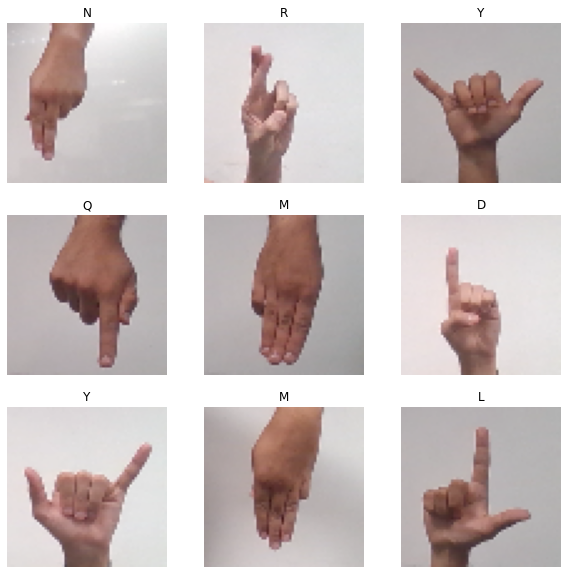

In [10]:
# sample_training_images, _ = next(train_data_gen) 
# def plotImages(images_arr):
#     fig, axes = plt.subplots(1, 5, figsize=(20,20))
#     axes = axes.flatten()
#     for img, ax in zip(images_arr, axes):
#         ax.imshow(img)
#     plt.tight_layout()
#     plt.show()
# plotImages(sample_training_images[:5])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data_gen.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

##Criar o Modelo

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4608, activation='relu'),
    tf.keras.layers.Dense(21)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

##Treinar o Modelo

In [14]:
EPOCHS = 60
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE)))
)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


1/1 [==============================] - 6s 6s/step - loss: 10.1467 - accuracy: 0.0312 - val_loss: 13.8405 - val_accuracy: 0.0312
Epoch 2/60
1/1 [==============================] - 2s 2s/step - loss: 17.7050 - accuracy: 0.0391 - val_loss: 8.4018 - val_accuracy: 0.0469
Epoch 3/60
1/1 [==============================] - 2s 2s/step - loss: 11.7612 - accuracy: 0.0312 - val_loss: 5.9954 - val_accuracy: 0.0781
Epoch 4/60
1/1 [==============================] - 2s 2s/step - loss: 6.3642 - accuracy: 0.0391 - val_loss: 5.9129 - val_accuracy: 0.0469
Epoch 5/60
1/1 [==============================] - 2s 2s/step - loss: 4.3044 - accuracy: 0.0156 - val_loss: 4.9996 - val_accuracy: 0.0859
Epoch 6/60
1/1 [==============================] - 3s 3s/step - loss: 5.5272 - accuracy: 0.0469 - val_loss: 4.1334 - val_accuracy: 0.0781
Epoch 7/60
1/1 [==============================] - 2s 2s/step - loss: 3.8724 - accuracy: 0.1094 - val_loss: 3.4036 - val_accuracy: 0.0781
Epoch 8/60
1/1 [==============================] 

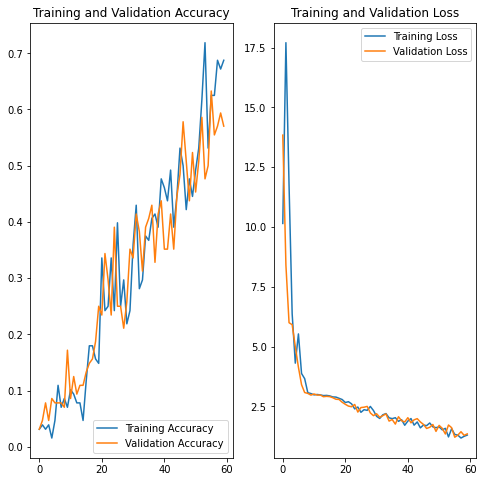

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

#Importar bibliotecas para Testes

In [17]:
import imutils #redimencionamento, rotacao
import numpy as np
import cv2 #import OpenCV
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript #webcan leitura
from google.colab.output import eval_js #webcan leitura
from base64 import b64decode #biblioteca para codificar dados binários
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#Testar com imagens de Validação

Mounted at /content/gdrive
1/1 [==============================] - 0s 24ms/step
This image most likely belongs to P with a 87.87 percent confidence.


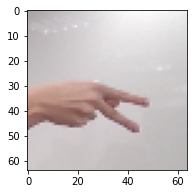

In [24]:
#photo_path = '50_100.jpg'
#photo = tf.keras.utils.get_file('photo', origin='50_100.jpg')
#resized = cv2.resize(image, (100,100), interpolation = cv2.INTER_AREA)
###
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
image = tf.keras.preprocessing.image.load_img("/content/gdrive/MyDrive/Kaggle/6.png", target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
###
#imagem="/content/gdrive/MyDrive/Kaggle/9.png"
#img = tf.keras.utils.load_img(imagem, target_size=(150, 150))
#imagex = cv2.imread(img)

# redimensiona para ter uma largura máxima de 400 pixels
#imagex = imutils.resize(image,  width=400)
#img = tf.keras.utils.load_img(imagem, target_size=(150, 150))
#cv2_imshow(image)
###Inibi até ###---
#imagem = tf.keras.utils.get_file('50_100.jpg', origin=image)
#img = tf.keras.utils.load_img(
##imagem, target_size=(150, 150)
#)
#Mostrar a imagem 
#(h, w) = image.shape[:2]
#print(w,h)
#cv2_imshow(image)

#img_array = tf.keras.utils.img_to_array(resized)
#img_array = tf.expand_dims(img_array, 0) # Create a batch
plt.figure(figsize=(10, 10))
ax = plt.subplot(3, 3, i + 1)
plt.imshow(image)
#plt.title(class_names(labels))
plt.axis("on")

#predictions = model.predict(img_array)
###---
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Testadas 10 imagens com 100% de acerto.
-------------------------------------------------------------
---



# Testar com foto da Webcam


Abrindo Webcam

In [25]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Caputando a imagem

<IPython.core.display.Javascript object>

400 300


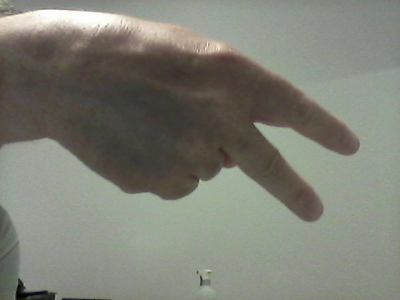

In [46]:
image_file = take_photo()

image = cv2.imread(image_file)

# redimensiona para ter uma largura máxima de 400 pixels
image = imutils.resize(image,  width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [47]:
resized = cv2.resize(image, (256,256), interpolation = cv2.INTER_AREA)

img_array = tf.keras.utils.img_to_array(resized)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 75ms/step
This image most likely belongs to A with a 31.08 percent confidence.


O reconhecimento por imagem de webcam está muito pouco assertivo. Uma das opções que tentarei para melhorar é usar o recurso de augmentation de imagens. Como havia necessidade de entregar o trabalho vou fazer após isso.

Outro recurso que pretendo implementar é o text-to-speech, para, quando tirar uma foto com a webcam o sistema "falar" a letra correspondente.